### 【問題1】2×2マスのチェス盤の小麦の数
```
2×2マスのチェス盤をndarrayによって表現し、各マスの小麦の数を計算してください。
左上のマスに小麦を1つ置いた後、その右が2つ、左下が4つ、右下が8つという風に進みます。
サンプルコードで作成したndarrayのshapeの変形を行ってください。
```

In [14]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

import numpy as np
small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

small_board_ndarray = small_board_ndarray.reshape(2, 2)
print("reshape：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]
4マスの板に小麦を並べる（ndarray）：[1 2 4 8]
reshape：[[1 2]
 [4 8]]


### 【問題2】n×mマスへの拡張
```
n×mマスのチェス盤の小麦の数を記したndarrayを返す関数を作成してください。
そして、この関数を使い8×8マスのチェス盤の小麦の数を求めてください。
```

In [95]:
import numpy as np

def generate_chess_board_with_wheat(n, m):
    n_squares = n * m
    board = [1]
    for _ in range(n_squares - 1):
        board.append(board[-1] * 2)
    return np.array(board, dtype=np.uint64).reshape(n, m)

board = generate_chess_board_with_wheat(8, 8)
display(board)

array([[                  1,                   2,                   4,
                          8,                  16,                  32,
                         64,                 128],
       [                256,                 512,                1024,
                       2048,                4096,                8192,
                      16384,               32768],
       [              65536,              131072,              262144,
                     524288,             1048576,             2097152,
                    4194304,             8388608],
       [           16777216,            33554432,            67108864,
                  134217728,           268435456,           536870912,
                 1073741824,          2147483648],
       [         4294967296,          8589934592,         17179869184,
                34359738368,         68719476736,        137438953472,
               274877906944,        549755813888],
       [      1099511627776,       

### 【問題3】小麦の数の合計
```
8×8マスのチェス盤の小麦の数の合計を求めてください。
また、各列の平均を求め、それを棒グラフで可視化してください。
棒グラフはサンプルコードを用意しています。
```

[9042521604759584.0, 1.808504320951917e+16, 3.617008641903834e+16, 7.234017283807667e+16, 1.4468034567615334e+17, 2.893606913523067e+17, 5.787213827046134e+17, 1.1574427654092268e+18]


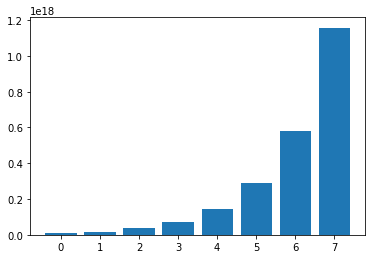

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

column_averages = [board[:, i].mean() for i in range(8)]

print(column_averages)

left = np.array(range(8))
height = np.array(column_averages)
plt.bar(left, height)
plt.show()

### 【問題4】小麦の数のヒートマップ
```
8×8マスのチェス盤の小麦の数をヒートマップとして可視化してください。
ヒートマップはサンプルコードを用意しています。
4行2列の配列のヒートマップです。
値が小さいところが紫、大きいところが黄色になっています。
```

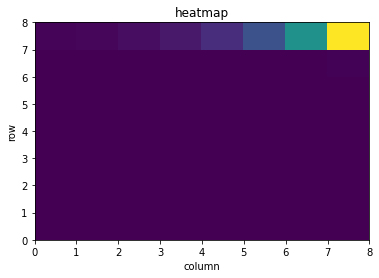

In [34]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(board)
plt.show()

###  【問題5】後半は前半の何倍か
```
チェス盤の後半にある小麦の数は前半にある小麦の数の何倍かを求めてください。
前半とは配列の0から3行目、後半は4から7行目です。
```

In [41]:
a = board[:4].sum()
b = board[4:].sum()
print(f"後半の小麦の合計は前半の {b / a} 倍")

後半の小麦の合計は前半の 4294967296.0 倍


### 【問題6】他の計算方法によるn×mマスへの拡張
```
問題2と同様の「n×mマスのチェス盤の小麦の数を記したndarrayを返す関数」を、
np.append()を使ったものと、ブロードキャストを使ったもので新たに作成してください。
それらの関数を使い8×8マスのチェス盤の小麦の数を再び求めてください。
```

In [117]:
def generate_chess_board_with_wheat2(n, m):
    n_squares = n * m
    board = np.array([1], dtype=np.uint64)
    for _ in range(n_squares - 1):        
        board = np.append(board, [board[-1] * 2]).astype(np.uint64)
    return board.reshape(n, m)

def generate_chess_board_with_wheat3(n, m):
    n_squares = n * m
    indices_of_squares = np.arange(n_squares).astype(np.uint64)
    board_ndarray = 2**indices_of_squares
    return board_ndarray.reshape(n, m)
    
# np.append()
board = generate_chess_board_with_wheat2(8, 8)
print(board)

# ブロードキャスト
print("--------------------")
board = generate_chess_board_with_wheat3(8, 8)
print(board)

[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     140737488355328

### 【問題7】計算時間の比較
```
3種類の方法を見てきました。それぞれの計算時間をJupyter Notebookの
`%%timeit` を用いて計測し、比較と考察を行ってください。
`%%timeit` はセル内のコードを複数回実行し、その平均実行時間を出力する働きをします。
```

In [127]:
%%timeit -n 1000
generate_chess_board_with_wheat(8, 8)

15.7 µs ± 1.42 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [126]:
%%timeit -n 1000
generate_chess_board_with_wheat2(8, 8)

605 µs ± 15.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [123]:
%%timeit -n 1000
generate_chess_board_with_wheat3(8, 8)

4.25 µs ± 1.11 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
